In [1]:
import pandas as pd
import geopandas as gpd

## MIGRATION RATE

epsg:3857


,Fin_code,NUTS_NAME,eng_name,from_est_to,code,im_1990,im_1991,im_1992,im_1993,im_1994,...,im_2011,im_2012,im_2013,im_2014,im_2015,im_2016,im_2017,im_2018,im_2019,geometry
0,MK05,MK05,MK05,Kanta-Häme,Kanta-Häme,0.0,0.0,33.0,110.0,77.0,...,78.0,122.0,154.0,167.0,103.0,57.0,50.0,45.0,33.0,"POLYGON ((2795339.948 8584285.958, 2794878.702..."
1,MK07,MK07,MK07,Päijät-Häme,Päijät-Häme,0.0,0.0,46.0,92.0,96.0,...,103.0,107.0,187.0,145.0,147.0,92.0,81.0,70.0,63.0,"POLYGON ((2929376.408 8766890.314, 2929589.440..."
2,MK04,MK04,MK04,Satakunta,Satakunta,0.0,0.0,41.0,89.0,89.0,...,140.0,162.0,195.0,195.0,144.0,77.0,71.0,40.0,43.0,"MULTIPOLYGON (((2556840.444 8635762.651, 25557..."
3,MK14,MK14,MK14,South Ostrobothnia,Etelä-Pohjanmaa,0.0,0.0,22.0,51.0,34.0,...,110.0,123.0,147.0,121.0,64.0,47.0,20.0,37.0,28.0,"POLYGON ((2637936.804 9194121.430, 2638090.648..."
4,MK15,MK15,MK15,Ostrobothnia,Pohjanmaa,0.0,0.0,6.0,33.0,28.0,...,65.0,90.0,94.0,106.0,92.0,40.0,22.0,32.0,32.0,"MULTIPOLYGON (((2545536.785 9308791.885, 25460..."


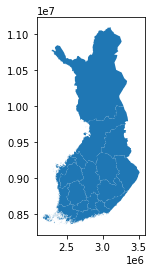

In [2]:
# reading the files
fth = r'data\fi_from_est_imigration.gpkg'
fi = gpd.read_file(fth, driver = 'GPKG')

fi.plot()
print(fi.crs)
fi.head(5)


epsg:3301


,MNIMI,MKOOD,EHAK,nimi,2000,2001,2002,2003,2004,2005,...,em_2011,em_2012,em_2013,em_2014,em_2015,em_2016,em_2017,em_2018,em_2019,geometry
0,Jõgeva maakond,0049,0049,Jõgeva maakond,248.29675,247.84937,272.51927,306.83982,350.74713,431.91492,...,146.0,151.0,143.0,100.0,104.0,94.0,78.0,72.0,35.0,"POLYGON ((670508.042 6529009.400, 670507.357 6..."
1,Järva maakond,0051,0051,Järva maakond,245.48464,284.40684,320.64474,376.18396,380.33822,439.52041,...,125.0,164.0,136.0,110.0,132.0,80.0,71.0,58.0,50.0,"POLYGON ((606662.600 6511670.030, 606640.150 6..."


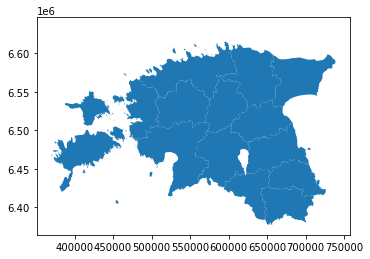

In [3]:
# reading the files
eth = r'data\est_to_fi_emigration.gpkg'
est = gpd.read_file(eth, driver = 'GPKG')

est.plot()
print(est.crs)
est.head(2)

In [4]:
# getting the needed columns 2015-2019
#fi.dtypes
fi = fi[['from_est_to', 'Fin_code', 'code', 'im_2015', 'im_2016', 'im_2017', 'im_2018', 'im_2019', 'geometry']].rename(columns = {'code':'eng_name'})

# calculating migration rate

fi['rate'] = (fi['im_2019'] - fi['im_2015'])/fi['im_2019']*100

# saving file
out = r'data\gwr_file\fi_gwr.gpkg'
fi.to_file(out, driver = 'GPKG')

In [5]:
fi.head()

,from_est_to,Fin_code,eng_name,im_2015,im_2016,im_2017,im_2018,im_2019,geometry,rate
0,Kanta-Häme,MK05,Kanta-Häme,103.0,57.0,50.0,45.0,33.0,"POLYGON ((2795339.948 8584285.958, 2794878.702...",-212.121212
1,Päijät-Häme,MK07,Päijät-Häme,147.0,92.0,81.0,70.0,63.0,"POLYGON ((2929376.408 8766890.314, 2929589.440...",-133.333333
2,Satakunta,MK04,Satakunta,144.0,77.0,71.0,40.0,43.0,"MULTIPOLYGON (((2556840.444 8635762.651, 25557...",-234.883721
3,South Ostrobothnia,MK14,Etelä-Pohjanmaa,64.0,47.0,20.0,37.0,28.0,"POLYGON ((2637936.804 9194121.430, 2638090.648...",-128.571429
4,Ostrobothnia,MK15,Pohjanmaa,92.0,40.0,22.0,32.0,32.0,"MULTIPOLYGON (((2545536.785 9308791.885, 25460...",-187.500000


In [6]:
# getting the needed columns 2015-2019
est.dtypes
est = est[['to_fi_from', 'MKOOD', 'em_2015', 'em_2016', 'em_2017', 'em_2018', 'em_2019', 'geometry']]

# calculating migration rate

est['rate'] = (est['em_2019'] - est['em_2015'])/est['em_2019']*100

# saving file
oute = r'data\gwr_file\est_gwr.gpkg'
est.to_file(oute, driver = 'GPKG')

In [7]:
est.head()

,to_fi_from,MKOOD,em_2015,em_2016,em_2017,em_2018,em_2019,geometry,rate
0,Jõgeva maakond,0049,104.0,94.0,78.0,72.0,35.0,"POLYGON ((670508.042 6529009.400, 670507.357 6...",-197.142857
1,Järva maakond,0051,132.0,80.0,71.0,58.0,50.0,"POLYGON ((606662.600 6511670.030, 606640.150 6...",-164.000000
2,Tartu maakond,0078,367.0,269.0,258.0,248.0,243.0,"MULTIPOLYGON (((623359.970 6443960.727, 623354...",-51.028807
3,Lääne maakond,0057,102.0,56.0,31.0,36.0,36.0,"MULTIPOLYGON (((477233.270 6488400.628, 477228...",-183.333333
4,Võru maakond,0086,120.0,89.0,77.0,92.0,68.0,"POLYGON ((704122.210 6415856.750, 704136.470 6...",-76.470588


## PROXIMITY

In [8]:
from shapely.geometry import LineString, Point
from pyproj import CRS

epsg:3857


,from_est_to,Fin_code,eng_name,geometry
0,Kanta-Häme,MK05,Kanta-Häme,POINT (2707982.338 8607544.460)
1,Päijät-Häme,MK07,Päijät-Häme,POINT (2861290.496 8675249.859)
2,Satakunta,MK04,Satakunta,POINT (2465522.068 8749577.531)
3,South Ostrobothnia,MK14,Etelä-Pohjanmaa,POINT (2566993.962 9037342.198)
4,Ostrobothnia,MK15,Pohjanmaa,POINT (2466478.997 9123225.898)


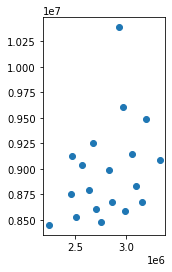

In [9]:
# reading centroids FI

fic = r'data\fi_centroids.gpkg'
ficen = gpd.read_file(fic, driver='GPKG')

ficen = ficen[['from_est_to', 'Fin_code', 'code', 'geometry']].rename(columns = {'code':'eng_name'})

ficen.plot()
print(ficen.crs)
ficen.head()

epsg:3301


,to_fi_from,MKOOD,geometry
0,Jõgeva maakond,0049,POINT (641677.304 6510803.267)
1,Järva maakond,0051,POINT (595517.341 6532055.332)
2,Tartu maakond,0078,POINT (660322.307 6472977.683)
3,Lääne maakond,0057,POINT (486577.788 6528417.158)
4,Võru maakond,0086,POINT (674206.169 6404622.592)


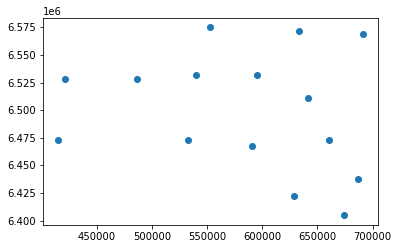

In [10]:
# reading centroids EST

estc = r'data\est_centroids.gpkg'
estcen = gpd.read_file(estc, driver='GPKG')

estcen = estcen[['to_fi_from', 'MKOOD', 'geometry']]

estcen.plot()
print(estcen.crs)
estcen.head()

In [11]:
# reading centroids HELSINKI
fi_h = r'data\Helsinki_centroid.gpkg'
hel_fi = gpd.read_file(fi_h, driver='GPKG')

est_h = r'data\Helsinki_centroid33.gpkg'
hel_est = gpd.read_file(est_h, driver='GPKG')

print(hel_fi.crs)
print(hel_est.crs)

epsg:3857
epsg:3301


POINT (2757445.145905122 8481824.116391713)


,Fin_code,geometry_line,dist
0,MK05,"LINESTRING (2707982.338 8607544.460, 2757445.1...",135.100608
1,MK07,"LINESTRING (2861290.496 8675249.859, 2757445.1...",219.539005
2,MK04,"LINESTRING (2465522.068 8749577.531, 2757445.1...",396.119899
3,MK14,"LINESTRING (2566993.962 9037342.198, 2757445.1...",587.258029
4,MK15,"LINESTRING (2466478.997 9123225.898, 2757445.1...",704.313528


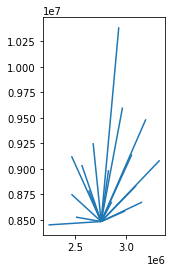

In [12]:
# FINLAND PROXIMITY

fi_centroid = hel_fi[['geometry']]
fi_centroid = fi_centroid.at[0, 'geometry']
print(fi_centroid)


# adding centroid to Finland
ficen['hel_cen'] = fi_centroid
ficen.head()

#creating LineString

ficen['fi_hubline'] = [LineString([begin, end]) for begin, end in zip(ficen['geometry'], ficen['hel_cen'])]
ficen.head()

# geodataframe with Hublines and distances
fi_hublines = ficen[[ 'Fin_code', 'fi_hubline']].rename(columns={'fi_hubline':'geometry_line'})

fi_hublines = gpd.GeoDataFrame(fi_hublines, geometry = 'geometry_line')
fi_hublines['dist'] = [line.length /1000 for line in fi_hublines['geometry_line']]


fi_hublines.plot()
fi_hublines.head()

In [13]:
# join to general dataset

fi_hublines.head()
fi = fi.merge(fi_hublines, on='Fin_code')


,from_est_to,Fin_code,eng_name,im_2015,im_2016,im_2017,im_2018,im_2019,geometry,rate,geometry_line,dist
0,Kanta-Häme,MK05,Kanta-Häme,103.0,57.0,50.0,45.0,33.0,"POLYGON ((2795339.948 8584285.958, 2794878.702...",-212.121212,"LINESTRING (2707982.338 8607544.460, 2757445.1...",135.100608
1,Päijät-Häme,MK07,Päijät-Häme,147.0,92.0,81.0,70.0,63.0,"POLYGON ((2929376.408 8766890.314, 2929589.440...",-133.333333,"LINESTRING (2861290.496 8675249.859, 2757445.1...",219.539005
2,Satakunta,MK04,Satakunta,144.0,77.0,71.0,40.0,43.0,"MULTIPOLYGON (((2556840.444 8635762.651, 25557...",-234.883721,"LINESTRING (2465522.068 8749577.531, 2757445.1...",396.119899
3,South Ostrobothnia,MK14,Etelä-Pohjanmaa,64.0,47.0,20.0,37.0,28.0,"POLYGON ((2637936.804 9194121.430, 2638090.648...",-128.571429,"LINESTRING (2566993.962 9037342.198, 2757445.1...",587.258029
4,Ostrobothnia,MK15,Pohjanmaa,92.0,40.0,22.0,32.0,32.0,"MULTIPOLYGON (((2545536.785 9308791.885, 25460...",-187.500000,"LINESTRING (2466478.997 9123225.898, 2757445.1...",704.313528


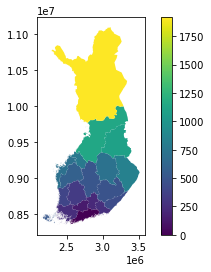

In [14]:
fi.plot(column = 'dist', legend = True)
fi.head()

POINT (542535.253954705 6692631.315112033)


,MKOOD,geometry_line,dist
0,0049,"LINESTRING (641677.304 6510803.267, 542535.254...",207.100423
1,0051,"LINESTRING (595517.341 6532055.332, 542535.254...",169.090946
2,0078,"LINESTRING (660322.307 6472977.683, 542535.254...",249.241866
3,0057,"LINESTRING (486577.788 6528417.158, 542535.254...",173.486389
4,0086,"LINESTRING (674206.169 6404622.592, 542535.254...",316.680050


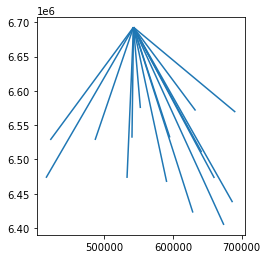

In [15]:
# ESTONIA PROXIMITY

est_centroid = hel_est[['geometry']]
est_centroid = est_centroid.at[0, 'geometry']
print(est_centroid)


# adding centroid to Estonia
estcen['hel_cen'] = est_centroid
estcen.head()

#creating LineString

estcen['est_hubline'] = [LineString([begin, end]) for begin, end in zip(estcen['geometry'], estcen['hel_cen'])]
ficen.head()

# geodataframe with Hublines and distances
est_hublines = estcen[['MKOOD', 'est_hubline']].rename(columns={'est_hubline':'geometry_line'})

est_hublines = gpd.GeoDataFrame(est_hublines, geometry = 'geometry_line')
est_hublines['dist'] = [line.length /1000 for line in est_hublines['geometry_line']]


est_hublines.plot()
est_hublines.head()

In [16]:
# join to general dataset

est_hublines.head()
est = est.merge(est_hublines, on='MKOOD')

,to_fi_from,MKOOD,em_2015,em_2016,em_2017,em_2018,em_2019,geometry,rate,geometry_line,dist
0,Jõgeva maakond,0049,104.0,94.0,78.0,72.0,35.0,"POLYGON ((670508.042 6529009.400, 670507.357 6...",-197.142857,"LINESTRING (641677.304 6510803.267, 542535.254...",207.100423
1,Järva maakond,0051,132.0,80.0,71.0,58.0,50.0,"POLYGON ((606662.600 6511670.030, 606640.150 6...",-164.000000,"LINESTRING (595517.341 6532055.332, 542535.254...",169.090946
2,Tartu maakond,0078,367.0,269.0,258.0,248.0,243.0,"MULTIPOLYGON (((623359.970 6443960.727, 623354...",-51.028807,"LINESTRING (660322.307 6472977.683, 542535.254...",249.241866
3,Lääne maakond,0057,102.0,56.0,31.0,36.0,36.0,"MULTIPOLYGON (((477233.270 6488400.628, 477228...",-183.333333,"LINESTRING (486577.788 6528417.158, 542535.254...",173.486389
4,Võru maakond,0086,120.0,89.0,77.0,92.0,68.0,"POLYGON ((704122.210 6415856.750, 704136.470 6...",-76.470588,"LINESTRING (674206.169 6404622.592, 542535.254...",316.680050


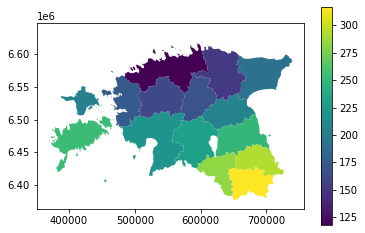

In [17]:
est.plot(column = 'dist', legend = True)
est.head()

In [18]:
# saving files
fi['geometry_line'] = fi['geometry_line'].astype(str)
fi.to_file(out, driver = 'GPKG')

est['geometry_line'] = est['geometry_line'].astype(str)
est.to_file(oute, driver = 'GPKG')